Lab11 - CNN Basics Convolution

 * Most Widely used for image classification
 * Generally, it consists of convolution layer, pooling layer, and fully connected layer
 * convolution, pooling layer - feature extraction
 * fully connected layer - classification


tf.keras.layers.Conv2D

 * filters : Convolution Filter의 수(Output Feature map의 Channel)
 * kernel size : Convolution Filter의 Size(integer, tuple/list)
 * stride : stride(filter의 이동간격, integer, tuple/list)
 * padding : "valid" / "same"(하단 설명 참조)
 * data_format : "channels_last" - (batch, height, width, channels)  / "channels_first" - (batch, channels, height, width)
 * activation : activation function
 * use_bias : bias를 쓸 것인지(boolean)
 * kernel_initalizer, bias_initializer : initialization method
 * kernel_regularizer, bias_regularizer : regularization method

Padding

 * valid padding : 패딩을 하지 않음
 * same padding : 패딩을 통해 Input과 Output의 크기를 동일하게 유지함

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(1, 3, 3, 1)


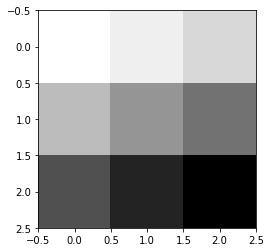

In [9]:
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]],dtype=np.float32)
print(image.shape) # batch, height, weight, channel 순서
plt.imshow(image.numpy().reshape(3,3),cmap='Greys')

weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


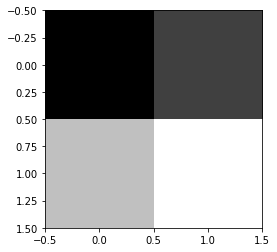

In [24]:
# 2x2의 모두 1로 되어 있는 filter. stride=1, padding=valid
weight = np.array([[[[1.]],[[1.]]],
                  [[[1.]],[[1.]]]])
print('weight.shape',weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1,kernel_size=2,padding='Valid',
                             kernel_initializer=weight_init)(image) # image를 입력으로 넣어준다.
print('conv2d.shape',conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2),cmap='gray')

weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


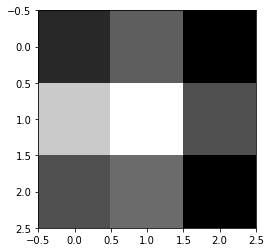

In [25]:
# 다른 부분은 동일하고, padding만 same으로 바꾸면?
# 2x2의 모두 1로 되어 있는 filter. stride=1, padding=same
weight = np.array([[[[1.]],[[1.]]],
                  [[[1.]],[[1.]]]])
print('weight.shape',weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1,kernel_size=2,padding='Same',
                             kernel_initializer=weight_init)(image) # image를 입력으로 넣어준다.
print('conv2d.shape',conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3),cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


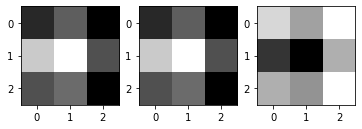

In [33]:
# filter를 여러개 쓴다면?
print('image.shape',image.shape)

weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                  [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print('weight.shape',weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3,kernel_size=2,padding='Same',
                             kernel_initializer=weight_init)(image)
print('conv2d.shape',conv2d.shape)

feature_maps = np.swapaxes(conv2d,0,3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3),cmap='gray')